In [1]:
# loading the required libraries  
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 
from fancyimpute import KNN 
from random import randrange, uniform
import warnings 
warnings.filterwarnings('ignore') 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from patsy import dmatrices 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn import metrics 
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score 

Using TensorFlow backend.


In [2]:
# Set working directory
os.chdir("E:\edWisor\Project")
os.getcwd()

'E:\\edWisor\\Project'

In [3]:
# Load the data
cab_train = pd.read_csv("train_cab.csv",sep = ',',dtype={'fare_amount':np.float},na_values={'fare_amount':'430-'})
cab_test = pd.read_csv("test.csv",sep = ',')

data =[cab_train,cab_test]
for i in data:
    i['pickup_datetime']=pd.to_datetime(i['pickup_datetime'],errors='coerce')

In [4]:
# Shape
cab_train.shape,cab_test.shape

((16067, 7), (9914, 6))

In [5]:
# Column names
cab_train.columns,cab_test.columns

(Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
       dtype='object'),
 Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
       dtype='object'))

In [6]:
# First 5 Observation
cab_train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
cab_test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
cab_train.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [9]:
cab_test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [10]:
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [11]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [12]:
# Exploratory data analysis
cab_train.loc[:,'passenger_count']=cab_train.loc[:,'passenger_count'].round()

In [13]:
# 1)Passenger count( unique values)
cab_train['passenger_count'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 2.360e+02, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02,
       3.540e+02, 5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02,
       5.345e+03, 5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01,
       5.310e+02, 5.570e+02])

In [14]:
sum(cab_train['passenger_count']>6) # sum of unique value in cab_train

20

In [15]:
cab_train[cab_train['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33+00:00,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00+00:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05+00:00,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05+00:00,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00+00:00,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00+00:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00+00:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29+00:00,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50+00:00,-73.988977,40.721068,-73.982368,40.732064,345.0


In [16]:
len(cab_train[cab_train['passenger_count']<1])

58

In [17]:
# unique values in cab_train
cab_train['passenger_count'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 2.360e+02, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02,
       3.540e+02, 5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02,
       5.345e+03, 5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01,
       5.310e+02, 5.570e+02])

In [18]:
# deleting out off range passenger count 
cab_train = cab_train.drop(cab_train[cab_train['passenger_count']>6].index, axis=0)
cab_train = cab_train.drop(cab_train[cab_train['passenger_count']<1].index, axis=0)

In [19]:
sum(cab_train['passenger_count']>6),sum(cab_train['passenger_count']<1)

(0, 0)

In [20]:
# 2) Fare amount
sum(cab_train['fare_amount']<1)

5

In [21]:
cab_train[cab_train['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [22]:
# fare amount - Values below 1 and - ve values are deleted
cab_train = cab_train.drop(cab_train[cab_train['fare_amount']<1].index, axis=0)

In [23]:
cab_train['fare_amount'].isnull().sum()

24

In [24]:
# 3) Latitudes range from -90 to 90, Longitudes range from -180 to 180
# In this format South latitudes and West longitudes preceded by a minus sign
print('pickup_longitude above 180={}'.format(sum(cab_train['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(cab_train['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(cab_train['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(cab_train['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(cab_train['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(cab_train['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(cab_train['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(cab_train['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [25]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(cab_train[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [26]:
cab_train = cab_train.drop(cab_train[cab_train['pickup_latitude']>90].index, axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    cab_train = cab_train.drop(cab_train[cab_train[i]==0].index, axis=0)

In [27]:
cab_train = cab_train.drop(cab_train[cab_train['pickup_longitude']>=0].index, axis=0)
cab_train = cab_train.drop(cab_train[cab_train['pickup_latitude']<=0].index, axis=0)
cab_train = cab_train.drop(cab_train[cab_train['dropoff_longitude']>=0].index, axis=0)
cab_train = cab_train.drop(cab_train[cab_train['dropoff_latitude']<=0].index, axis=0)

In [28]:
cab_train.shape

(15652, 7)

In [29]:
df=cab_train.copy()
# cab_train=df.copy()

Missing value analysis

In [30]:
# Creating missing value analysis
missing_val = pd.DataFrame(cab_train.isnull().sum())

# Resetting index
missing_val = missing_val.reset_index()

# Rename variables
missing_val = missing_val.rename(columns={'index':"Variables",0:"Missing_perc"})

#Calculate percentage
missing_val['Missing_perc'] = (missing_val['Missing_perc']/len(cab_train))*100

# Descending order
missing_val = missing_val.sort_values('Missing_perc',ascending = False).reset_index(drop = True)

# Save the missing percentage document
missing_val.to_csv("Missing_perc_cab_train_python.csv",index = False)

missing_val

,Variables,Missing_perc
0,passenger_count,0.351393
1,fare_amount,0.140557
2,pickup_datetime,0.006389
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [31]:
cab_train = cab_train.reset_index(drop=True)

In [32]:
#pickup_datetime variable is separated and formed into dataframe, it is mergerd to cab_train for feature engineering
pickup_datetime=pd.DataFrame(cab_train['pickup_datetime'])

In [33]:
pickup_datetime.shape

(15652, 1)

In [34]:
pickup_datetime.head(5)

,pickup_datetime
0,2009-06-15 17:26:21+00:00
1,2010-01-05 16:52:16+00:00
2,2011-08-18 00:35:00+00:00
3,2012-04-21 04:30:42+00:00
4,2010-03-09 07:51:00+00:00


Imputation method

In [35]:
cab_train['fare_amount'].loc[14]

12.5

In [36]:
# Actual value = 12.5
# Mean imputed value = 15.11
# Median imputed value = 8.5
# KNN imputed value = 8.8

In [37]:
cab_train['fare_amount'].loc[14]=np.nan

In [38]:
cab_train['fare_amount'].loc[14]

nan

In [39]:
cab_train = cab_train.drop(['pickup_datetime'],axis=1)

In [40]:
cab_train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [41]:
# Impute with mean
# cab_train['fare_amount'] = cab_train['fare_amount'].fillna(cab_train['fare_amount'].mean())

# Impute with median
# cab_train['fare_amount'] = cab_train['fare_amount'].fillna(cab_train['fare_amount'].median())


In [42]:
# KNN imputation
imp1=pd.DataFrame(KNN(k=3).fit_transform(cab_train.iloc[0:10000,:]),columns = cab_train.columns)

Imputing row 1/10000 with 0 missing, elapsed time: 40.116
Imputing row 101/10000 with 0 missing, elapsed time: 49.855
Imputing row 201/10000 with 0 missing, elapsed time: 49.861
Imputing row 301/10000 with 0 missing, elapsed time: 49.864
Imputing row 401/10000 with 0 missing, elapsed time: 49.866
Imputing row 501/10000 with 0 missing, elapsed time: 49.870
Imputing row 601/10000 with 0 missing, elapsed time: 49.874
Imputing row 701/10000 with 0 missing, elapsed time: 49.878
Imputing row 801/10000 with 0 missing, elapsed time: 49.881
Imputing row 901/10000 with 0 missing, elapsed time: 49.883
Imputing row 1001/10000 with 0 missing, elapsed time: 49.885
Imputing row 1101/10000 with 0 missing, elapsed time: 49.886
Imputing row 1201/10000 with 0 missing, elapsed time: 49.887
Imputing row 1301/10000 with 0 missing, elapsed time: 49.889
Imputing row 1401/10000 with 0 missing, elapsed time: 49.891
Imputing row 1501/10000 with 0 missing, elapsed time: 49.892
Imputing row 1601/10000 with 0 missi

In [43]:
imp2=pd.DataFrame(KNN(k=3).fit_transform(cab_train.iloc[10000:15652,:]),columns = cab_train.columns)

Imputing row 1/5652 with 0 missing, elapsed time: 6.347
Imputing row 101/5652 with 0 missing, elapsed time: 6.347
Imputing row 201/5652 with 0 missing, elapsed time: 6.348
Imputing row 301/5652 with 0 missing, elapsed time: 6.348
Imputing row 401/5652 with 0 missing, elapsed time: 6.349
Imputing row 501/5652 with 0 missing, elapsed time: 6.349
Imputing row 601/5652 with 0 missing, elapsed time: 6.350
Imputing row 701/5652 with 0 missing, elapsed time: 6.350
Imputing row 801/5652 with 0 missing, elapsed time: 6.351
Imputing row 901/5652 with 0 missing, elapsed time: 6.351
Imputing row 1001/5652 with 0 missing, elapsed time: 6.352
Imputing row 1101/5652 with 0 missing, elapsed time: 6.352
Imputing row 1201/5652 with 0 missing, elapsed time: 6.353
Imputing row 1301/5652 with 0 missing, elapsed time: 6.353
Imputing row 1401/5652 with 0 missing, elapsed time: 6.354
Imputing row 1501/5652 with 0 missing, elapsed time: 6.354
Imputing row 1601/5652 with 0 missing, elapsed time: 6.355
Imputing 

In [44]:
cab_train = imp1.append(imp2)

In [45]:
cab_train = cab_train.reset_index(drop=True)

In [46]:
cab_train['fare_amount'].loc[14]

8.869716701649539

In [47]:
df1=cab_train.copy()
# cab_train=df1.copy()

In [48]:
cab_train.loc[:,'passenger_count']=cab_train.loc[:,'passenger_count'].round()
cab_train['passenger_count']=cab_train['passenger_count'].astype('int')

In [49]:
cab_train['passenger_count'].describe()

count    15652.000000
mean         1.651099
std          1.265417
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

Outlier analysis

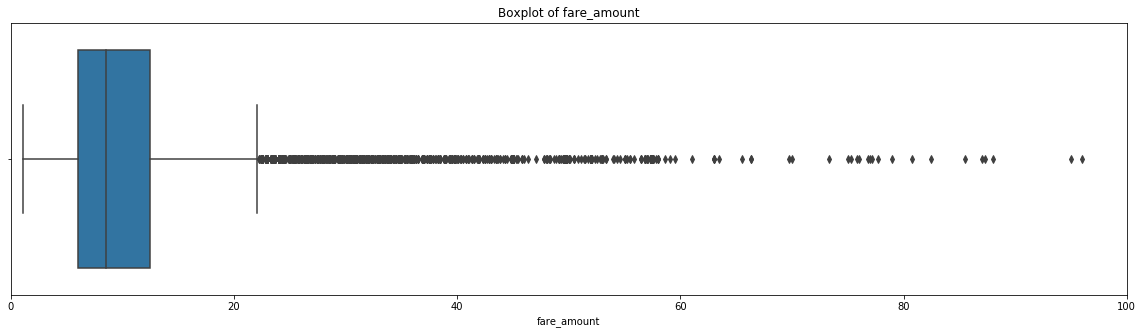

In [50]:
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=cab_train['fare_amount'],data=cab_train,orient='h')
plt.title('Boxplot of fare_amount')
# plt.savefig('bp of fare_amount.png')
plt.show()

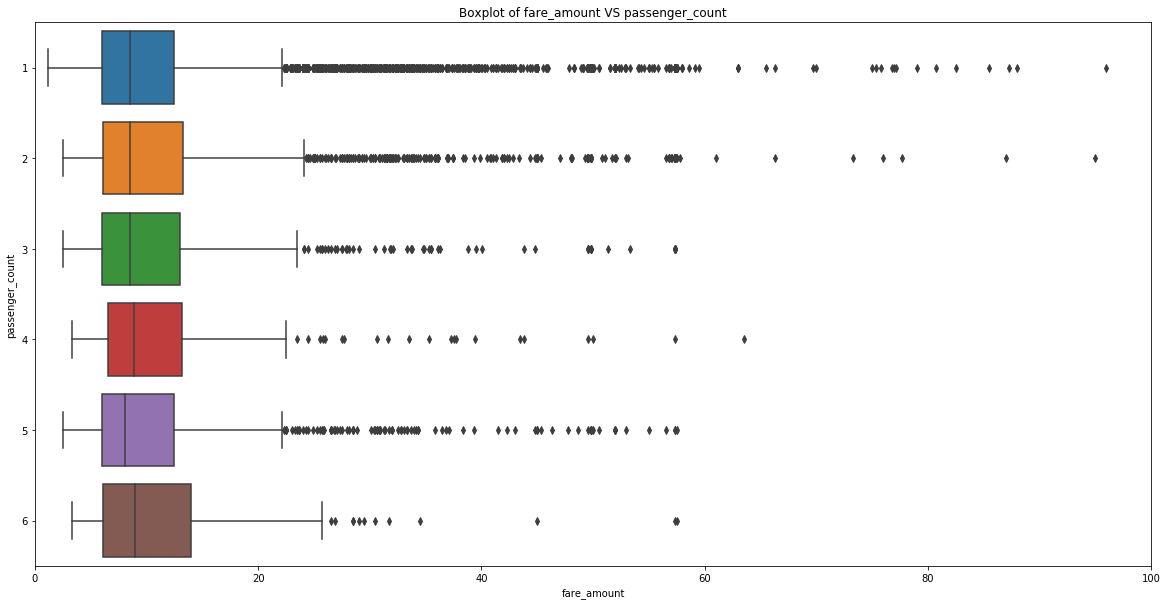

In [51]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=cab_train['fare_amount'],y=cab_train['passenger_count'],data=cab_train,orient='h')
plt.title('Boxplot of fare_amount VS passenger_count')
# plt.savefig('Boxplot of fare_amount w.r.t passenger_count.png')
plt.show()

In [52]:
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(cab_train[col], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    cab_train.loc[cab_train[col] < minimum,col] = np.nan
    cab_train.loc[cab_train[col] > maximum,col] = np.nan

In [53]:
outlier_treatment('fare_amount')

12.5 6.0
-3.75 22.25


In [54]:
cab_train.isnull().sum()

fare_amount          1358
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
dtype: int64

In [55]:
# KNN imputation
imp3=pd.DataFrame(KNN(k=3).fit_transform(cab_train.iloc[0:10000,:]),columns = cab_train.columns)
imp4=pd.DataFrame(KNN(k=3).fit_transform(cab_train.iloc[10000:15652,:]),columns = cab_train.columns)
# cab_train=pd.DataFrame(KNN(k=3).fit_transform(cab_train),columns = cab_train.columns)

Imputing row 1/10000 with 0 missing, elapsed time: 24.547
Imputing row 101/10000 with 0 missing, elapsed time: 27.862
Imputing row 201/10000 with 0 missing, elapsed time: 27.872
Imputing row 301/10000 with 1 missing, elapsed time: 27.877
Imputing row 401/10000 with 0 missing, elapsed time: 27.885
Imputing row 501/10000 with 0 missing, elapsed time: 27.894
Imputing row 601/10000 with 1 missing, elapsed time: 30.317
Imputing row 701/10000 with 0 missing, elapsed time: 32.866
Imputing row 801/10000 with 0 missing, elapsed time: 32.873
Imputing row 901/10000 with 0 missing, elapsed time: 32.877
Imputing row 1001/10000 with 0 missing, elapsed time: 32.883
Imputing row 1101/10000 with 1 missing, elapsed time: 32.888
Imputing row 1201/10000 with 0 missing, elapsed time: 32.892
Imputing row 1301/10000 with 0 missing, elapsed time: 32.895
Imputing row 1401/10000 with 0 missing, elapsed time: 32.899
Imputing row 1501/10000 with 0 missing, elapsed time: 32.903
Imputing row 1601/10000 with 0 missi

In [56]:
cab_train = imp3.append(imp4)

In [57]:
cab_train = cab_train.reset_index(drop=True)

In [58]:
cab_train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [59]:
df2=cab_train.copy()
# cab_train=df2.copy()

Feature engineering

In [60]:
cab_train['passenger_count']=cab_train['passenger_count'].astype('int').round().astype('object').astype('category')

In [61]:
# we will join 2 Dataframes pickup_datetime and cab_train
cab_train = pd.merge(pickup_datetime,cab_train,right_index=True,left_index=True)
cab_train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [62]:
cab_train.shape

(15652, 7)

In [63]:
cab_train = cab_train.reset_index(drop=True)

In [64]:
cab_train.isnull().sum()

pickup_datetime      1
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [65]:
# We will drop 1 NA of pickup datetime
cab_train=cab_train.dropna()

In [66]:
# 1. Feature engineering for 'pickup_datetime' variable
data_1 = [cab_train,cab_test]
for i in data_1:
    i["pickup_year"] = i["pickup_datetime"].apply(lambda row: row.year)
    i["pickup_month"] = i["pickup_datetime"].apply(lambda row: row.month)
    i["pickup_day_of_week"] = i["pickup_datetime"].apply(lambda row: row.dayofweek)
    i["pickup_hour"] = i["pickup_datetime"].apply(lambda row: row.hour)

In [67]:
cab_train.columns

Index(['pickup_datetime', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_day_of_week', 'pickup_hour'],
      dtype='object')

In [68]:
cab_test.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_day_of_week', 'pickup_hour'],
      dtype='object')

In [69]:
# 2.Calutlate the distance using longitude and latitude

from math import sin, cos, sqrt, atan2, radians,asin 

#Calculate the great circle distance between two points on the earth (specifie d in decimal degrees) 
def haversine_np(lon1, lat1, lon2, lat2):        
    # Convert latitude and longitude to radians    
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2]) 
   # Find the differences    
    dlon = lon2 - lon1    
    dlat = lat2 - lat1 
   # Apply the formula     
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2        
    # Calculate the angle (in radians)    
    c = 2 * np.arcsin(np.sqrt(a))        
    # Convert to kilometers    
    km = 6367 * c        
    return km 
cab_train['distance'] =  haversine_np(cab_train['pickup_longitude'],cab_train['pickup_latitude'],cab_train['dropoff_longitude'], cab_train['dropoff_latitude'])  
cab_test['distance'] =  haversine_np(cab_test['pickup_longitude'],cab_test['pickup_latitude'],cab_test['dropoff_longitude'], cab_test['dropoff_latitude'])

In [70]:
sum(cab_train['distance']>130)
cab_train = cab_train.drop(cab_train[cab_train['distance']>130].index, axis=0)

In [71]:
cab_train = cab_train.drop(cab_train[cab_train['distance']>130].index, axis=0)

In [72]:
cab_train.head(5)

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day_of_week,pickup_hour,distance
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,1.030117
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,8.444828
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,1.388653
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,2.797513
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,1.997902


In [73]:
cab_test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day_of_week,pickup_hour,distance
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,2.321801
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,2.423830
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,0.618239
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,1.959801
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,5.383919


In [74]:
# dropping variables used for feature engineering
cab_train=cab_train.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],axis=1)
cab_test=cab_test.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],axis=1)

In [75]:
cab_train.shape,cab_test.shape

((15649, 7), (9914, 6))

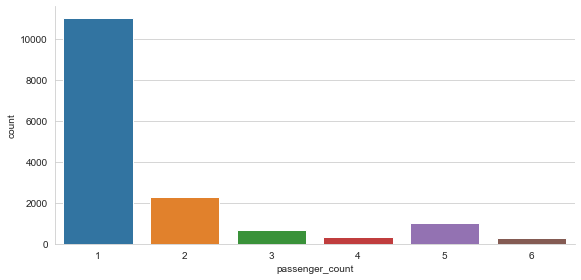

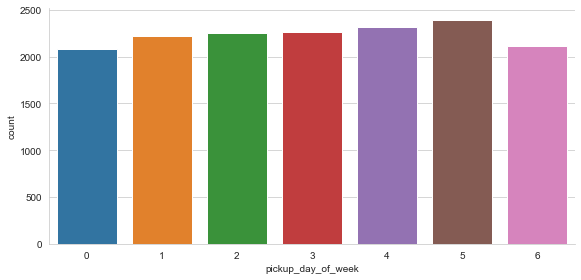

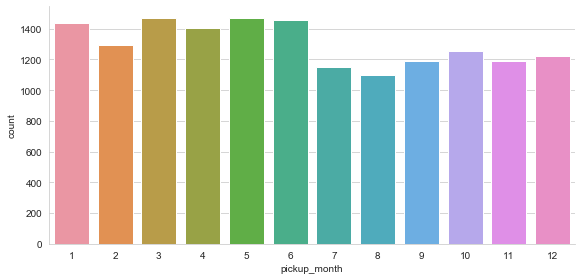

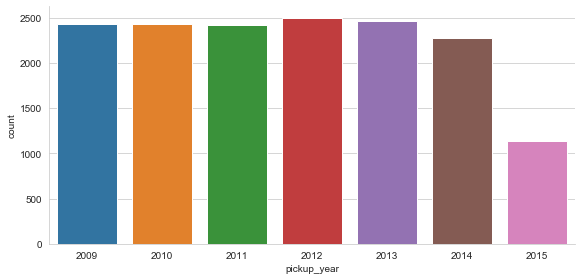

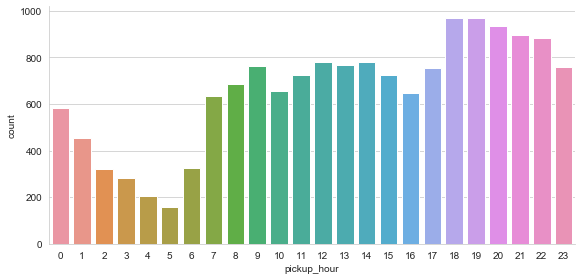

In [76]:
#Visualization
sns.set_style("whitegrid")
sns.catplot(data=cab_train, x='passenger_count', kind= 'count',height=4,aspect=2)
sns.catplot(data=cab_train, x='pickup_day_of_week', kind= 'count',height=4,aspect=2)
sns.catplot(data=cab_train, x='pickup_month', kind= 'count',height=4,aspect=2)
sns.catplot(data=cab_train, x='pickup_year', kind= 'count',height=4,aspect=2)
sns.catplot(data=cab_train, x='pickup_hour', kind= 'count',height=4,aspect=2)

Feature Selection

In [77]:
# Categorizing data based on continuous and categorical variables

continuous_names =['fare_amount','distance']
categorical_names =['passenger_count','pickup_year', 'pickup_month', 'pickup_day_of_week', 'pickup_hour']

In [78]:
# Correlation analysis
df_corr = cab_train.loc[:,continuous_names]

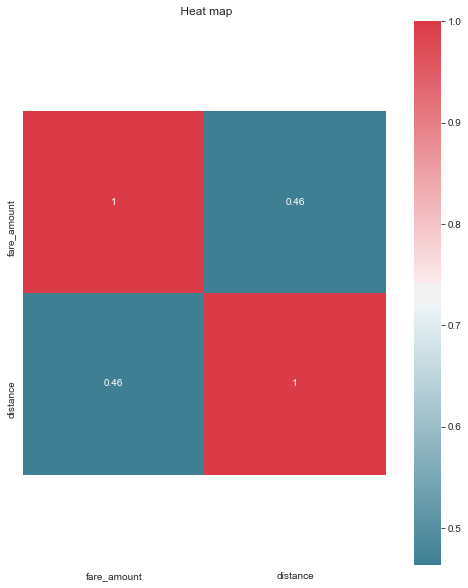

In [79]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(10, 10))

#Generate the correlation matrix
corr = df_corr.corr()

#Plot using seaborn library(bottom, top = ax1.get_ylim(),ax1.set_ylim(bottom + 0.5, top - 0.5)) is added to remove heat map cut-off
ax1 = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot =True)
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.title(" Heat map")
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')

 We can see from above correlation plot fare_amount and distance are correlated to each other.

In [80]:
#Multicollinearity Test
outcome, predictors = dmatrices('fare_amount ~ distance+passenger_count+pickup_year+pickup_month+pickup_day_of_week+pickup_hour',cab_train, return_type='dataframe')
# calculating VIF for each individual Predictors
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,1.188500e+06,Intercept
1,1.036317e+00,passenger_count[T.2]
2,1.017981e+00,passenger_count[T.3]
3,1.010033e+00,passenger_count[T.4]
4,1.024651e+00,passenger_count[T.5]
5,1.016178e+00,passenger_count[T.6]
6,1.001886e+00,distance
7,1.025795e+00,pickup_year
8,1.014608e+00,pickup_month
9,1.014377e+00,pickup_day_of_week


So we have no or very low multicollinearity

Feature Scaling

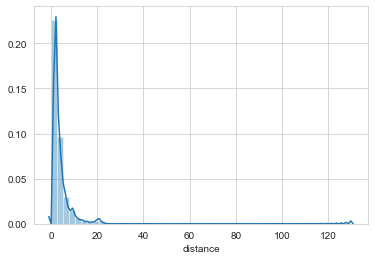

In [81]:

sns.distplot(cab_train['distance'],bins=50)

In [82]:
 # As our variables are left sckew here we select Normalisation method  
for i in continuous_names:    
    print(i)    
    if i == 'fare_amount':        
        continue    
    cab_train[i] = (cab_train[i] - cab_train[i].min())/(cab_train[i].max() - cab_train[i].min()) 

fare_amount
distance


In [83]:
#Create dummy variables of factor variables
dm1 = pd.get_dummies(data = cab_train, columns = categorical_names)
dm2 = pd.get_dummies(data = cab_test, columns = categorical_names)

In [84]:
dm3 = dm1.copy()
# dm1=dm3.copy()

In [85]:
dm4=dm2.copy()
# dm2=dm4.copy()

In [86]:
dm1.shape,dm2.shape

((15649, 58), (9914, 57))

In [87]:
dm1.columns

Index(['fare_amount', 'distance', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'pickup_year_2009', 'pickup_year_2010',
       'pickup_year_2011', 'pickup_year_2012', 'pickup_year_2013',
       'pickup_year_2014', 'pickup_year_2015', 'pickup_month_1',
       'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5',
       'pickup_month_6', 'pickup_month_7', 'pickup_month_8', 'pickup_month_9',
       'pickup_month_10', 'pickup_month_11', 'pickup_month_12',
       'pickup_day_of_week_0', 'pickup_day_of_week_1', 'pickup_day_of_week_2',
       'pickup_day_of_week_3', 'pickup_day_of_week_4', 'pickup_day_of_week_5',
       'pickup_day_of_week_6', 'pickup_hour_0', 'pickup_hour_1',
       'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5',
       'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9',
       'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12'

In [88]:
dm2.columns

Index(['distance', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6', 'pickup_year_2009', 'pickup_year_2010',
       'pickup_year_2011', 'pickup_year_2012', 'pickup_year_2013',
       'pickup_year_2014', 'pickup_year_2015', 'pickup_month_1',
       'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5',
       'pickup_month_6', 'pickup_month_7', 'pickup_month_8', 'pickup_month_9',
       'pickup_month_10', 'pickup_month_11', 'pickup_month_12',
       'pickup_day_of_week_0', 'pickup_day_of_week_1', 'pickup_day_of_week_2',
       'pickup_day_of_week_3', 'pickup_day_of_week_4', 'pickup_day_of_week_5',
       'pickup_day_of_week_6', 'pickup_hour_0', 'pickup_hour_1',
       'pickup_hour_2', 'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5',
       'pickup_hour_6', 'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9',
       'pickup_hour_10', 'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_

In [89]:
df3=cab_train.copy()
# cab_train=df3.copy()

In [90]:
# Divide the data into test and train (simple random sampling)
X = dm1.drop('fare_amount',axis=1).values
y = dm1['fare_amount'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)
print(dm1.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(15649, 58) (12519, 57) (3130, 57) (12519,) (3130,)


Model development

In [91]:
# Linear regression model

#Import libraries for LR 
# import statsmodels.api as sm 
# from sklearn.metrics import mean_squared_error 
# from sklearn.metrics import r2_score 

In [92]:
# Train the model using the training sets 
model = sm.OLS(y_train, X_train).fit() 

In [93]:
# predictions for train model 
predictions_LR = model.predict(X_train) 

In [94]:
# predictions with test sample 
predictions_LR = model.predict(X_test) 

In [95]:
#Define function to calculate RMSE
def RMSE(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [96]:
#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test,predictions_LR)))
print("R^2: "+str(r2_score(y_test,predictions_LR)))

RMSE: 3.9543800581630935
R^2: 0.22577649071824646


In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     81.11
Date:                Sat, 26 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:24:30   Log-Likelihood:                -34633.
No. Observations:               12519   AIC:                         6.937e+04
Df Residuals:                   12466   BIC:                         6.977e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            60.4480      1.005     60.120      0.000      58.477      62.419
x2             2.2533      0.063     36.012      0.000       2.131       2.376
x3             2.1776      0.094     23.224      0.000       1.994       2.361
x4             2.2039      0.155     14.237      0.000       1.900       2.507
x5             2.5523      0.214     11.902      0.000       2.132       2.973
x6             2.1583      0.129     16.765      0.000       1.906       2.411
x7             2.5672      0.226     11.343      0.000       2.124       3.011
x8             1.1865      0.085     13.947      0.000       1.020       1.353
x9             1.2535      0.085     14.822      0.000       1.088       1.419
x10            1.3510      0.084     16.059      0.000       1.186       1.516
x11            1.8256      0.082     22.142      0.000       1.664       1.987
x12            2.5498      0.084     30.485      0.000       2.386       2.714
x13            2.6530      0.086     30.810      0.000       2.484       2.822
x14            3.0932      0.123     25.109      0.000       2.852       3.335
x15            0.6126      0.111      5.494      0.000       0.394       0.831
x16            0.9174      0.115      7.944      0.000       0.691       1.144
x17            1.0375      0.109      9.522      0.000       0.824       1.251
x18            1.0380      0.111      9.344      0.000       0.820       1.256
x19            1.3734      0.110     12.440      0.000       1.157       1.590
x20            1.1297      0.109     10.342      0.000       0.916       1.344
x21            1.1740      0.122      9.661      0.000       0.936       1.412
x22            0.9862      0.124      7.970      0.000       0.744       1.229
x23            1.4593      0.121     12.070      0.000       1.222       1.696
x24            1.5103      0.118     12.790      0.000       1.279       1.742
x25            1.2932      0.120     10.747      0.000       1.057       1.529
x26            1.3810      0.118     11.658      0.000       1.149       1.613
x27            1.8907      0.090     20.899      0.000       1.713       2.068
x28            2.0565      0.088     23.489      0.000       1.885       2.228
x29            2.0338      0.087     23.378      0.000       1.863       2.204
x30            1.9008      0.087     21.808      0.000       1.730       2.072
x31            2.1394      0.085     25.087      0.000       1.972       2.307
x32            2.0034      0.084     23.906      0.000       1.839       2.168
x33            1.8880      0.090     20.995      0.000       1.712       2.064
x34            1.0558      0.176      5.988      0.000       0.710       1.401
x35            1.2242      0.198      6.186      0.000       0.836       1.612
x36            1.2864      0.230      5.590      0.000       0.835       1.737
x3

In [98]:
#Decision tree

# Decision tree regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [99]:
#Apply model for test data
predictions_DT = fit_DT.predict(X_test)

In [100]:
#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test,predictions_DT)))
print("R^2: "+str(r2_score(y_test,predictions_DT)))

RMSE: 2.690814781759607
R^2: 0.6415099143079993


In [101]:
#Random forest

rf_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

In [102]:
#Perdict for test cases
predictions_RF = rf_model.predict(X_test)

In [103]:
#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test,predictions_RF)))
print("R^2:"+str(r2_score(y_test,predictions_RF)))

RMSE: 2.415041845926718
R^2:0.7112254868070074


In [104]:
#XGboost
# from sklearn.ensemble import GradientBoostingRegressor 

# Building model on top of training dataset 
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

In [105]:
predictions_xgb = fit_GB.predict(X_test)

In [106]:
#Calculate RMSE and R-squared value
print("RMSE: "+str(RMSE(y_test,predictions_xgb)))
print("R^2:"+str(r2_score(y_test,predictions_xgb)))

RMSE: 2.3526729882743065
R^2:0.7259481914966992


In [107]:
# finilizing model( XGboost)
test_1 = dm2

In [108]:
test_1.shape

(9914, 57)

In [109]:
train = dm3

In [110]:
train.shape

(15649, 58)

In [111]:
y_train= dm3['fare_amount'] 
dm3.drop(['fare_amount'], inplace = True, axis=1) 
X_train = dm3

In [112]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train) 

In [113]:
predictions_xgb = fit_GB.predict(test_1)

In [114]:
Test_prediction = pd.DataFrame(predictions_xgb)

In [115]:
Test_prediction.describe()

,0
count,9914.000000
mean,8.239925
std,1.101356
min,4.455046
25%,7.518096
50%,7.976435
75%,8.689823
max,17.504803


In [116]:
Test_prediction = Test_prediction.rename(columns={0:"Prediction_fare_amount"})

In [117]:
Test_prediction.to_csv("test_predict_py.csv",index=False)